In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HDFCBANK.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


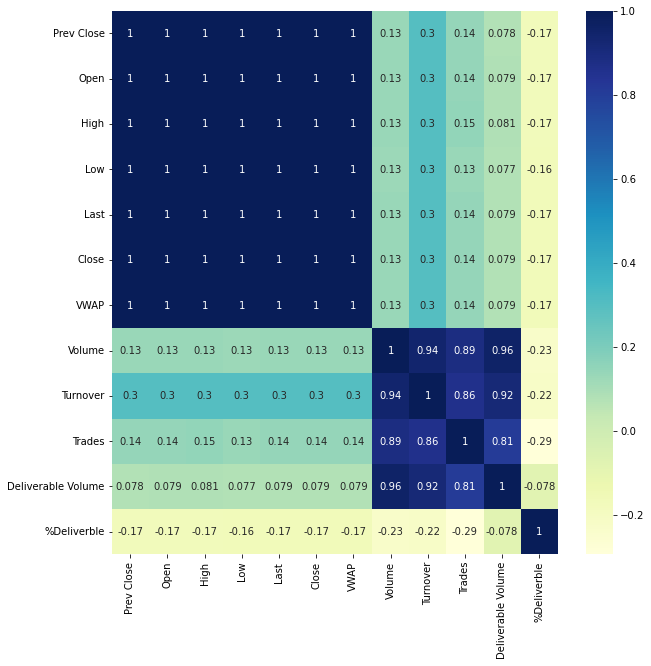

In [3]:
fig, ax = plt.subplots(figsize=(10,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [4]:
data = df[['Date','Open','High','Low','Volume','VWAP']]

In [5]:
df.set_index("Date", drop=False, inplace=True)

<AxesSubplot:xlabel='Date'>

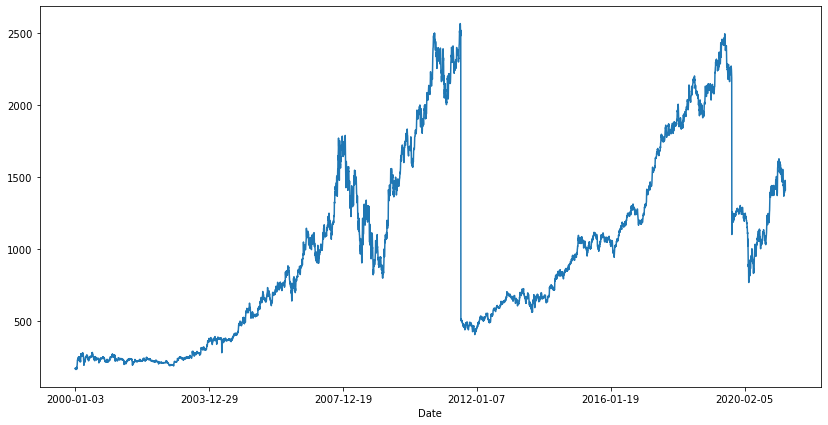

In [6]:
df.Close.plot(figsize=(14, 7))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5306 non-null   object 
 1   Open    5306 non-null   float64
 2   High    5306 non-null   float64
 3   Low     5306 non-null   float64
 4   Volume  5306 non-null   int64  
 5   VWAP    5306 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 248.8+ KB


In [8]:
df.reset_index(drop=True, inplace=True)
lag_features = ["Open","High", "Low","VWAP"]
window1 = 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')

In [9]:
df.fillna(df.mean(), inplace=True)

C:\Users\lokev\AppData\Local\Temp\ipykernel_11160\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [10]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,...,1.261883e+06,0.595003,1007.146851,19.402134,1019.656921,18.155846,993.502808,18.507912,1006.602844,17.706951
2000-01-04,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,...,1.261883e+06,0.595003,166.000000,19.402134,170.000000,18.155846,166.000000,18.507912,169.520004,17.706951
2000-01-05,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,...,1.261883e+06,0.595003,174.000000,11.313708,176.725006,9.510586,168.500000,3.535534,172.255005,3.867874
2000-01-06,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,...,1.261883e+06,0.595003,172.666672,8.326664,175.783340,6.919959,167.333328,3.214550,171.236664,3.254417
2000-01-07,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,...,1.261883e+06,0.595003,173.333328,7.187953,175.783340,6.347096,167.100006,2.814694,170.876663,3.002692


In [11]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,...,19.402134,1019.656921,18.155846,993.502808,18.507912,1006.602844,17.706951,1,3,0
2000-01-04,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,...,19.402134,170.000000,18.155846,166.000000,18.507912,169.520004,17.706951,1,4,1
2000-01-05,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,...,11.313708,176.725006,9.510586,168.500000,3.535534,172.255005,3.867874,1,5,2
2000-01-06,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,...,8.326664,175.783340,6.919959,167.333328,3.214550,171.236664,3.254417,1,6,3
2000-01-07,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,...,7.187953,175.783340,6.347096,167.100006,2.814694,170.876663,3.002692,1,7,4


In [12]:
#EDA

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] =(9,5)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [14]:
start_date = "2019-04-30"
end_date = "2021-04-30"

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df1 =df.loc[mask]

df1


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-30,2019-04-30,HDFCBANK,EQ,2280.95,2285.00,2320.00,2278.40,2319.00,2317.45,2306.89,...,25.945816,2289.233398,15.952023,2253.966553,16.801584,2269.479980,16.022917,4,30,1
2019-05-02,2019-05-02,HDFCBANK,EQ,2317.45,2323.50,2359.65,2317.50,2356.00,2355.80,2345.11,...,25.893892,2301.266602,17.282667,2264.416748,16.465429,2283.783447,17.919800,5,2,3
2019-05-03,2019-05-03,HDFCBANK,EQ,2355.80,2364.20,2378.00,2356.50,2365.00,2367.95,2370.96,...,27.929710,2321.550049,27.729082,2284.266602,25.601820,2307.443359,29.569883,5,3,4
2019-05-06,2019-05-06,HDFCBANK,EQ,2367.95,2348.00,2351.90,2317.05,2327.90,2328.45,2338.56,...,38.562531,2352.550049,38.137840,2317.466553,42.502419,2340.986572,43.232307,5,6,0
2019-05-07,2019-05-07,HDFCBANK,EQ,2328.45,2351.90,2358.00,2318.00,2320.10,2322.35,2338.90,...,42.736435,2363.183350,38.151363,2330.350098,40.849350,2351.543213,42.332779,5,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,HDFCBANK,EQ,1414.15,1413.00,1429.00,1402.75,1407.55,1404.80,1413.19,...,24.000355,1429.266724,12.792925,1385.066650,21.107431,1405.636719,17.823206,4,26,0
2021-04-27,2021-04-27,HDFCBANK,EQ,1404.80,1407.25,1442.00,1404.80,1435.05,1438.70,1430.40,...,18.965643,1430.133301,8.765924,1391.333374,18.564156,1408.270020,14.871682,4,27,1
2021-04-28,2021-04-28,HDFCBANK,EQ,1438.70,1436.25,1479.00,1431.00,1475.00,1476.80,1463.19,...,18.922659,1435.199951,9.546004,1402.583374,19.150476,1420.643311,16.755983,4,28,2


<function matplotlib.pyplot.show(close=None, block=None)>

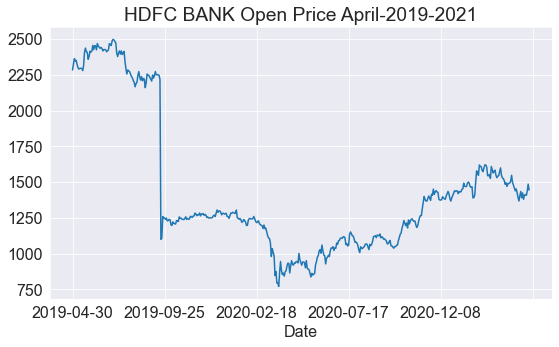

In [15]:
df1['Open'].plot()
plt.title("HDFC BANK Open Price April-2019-2021")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

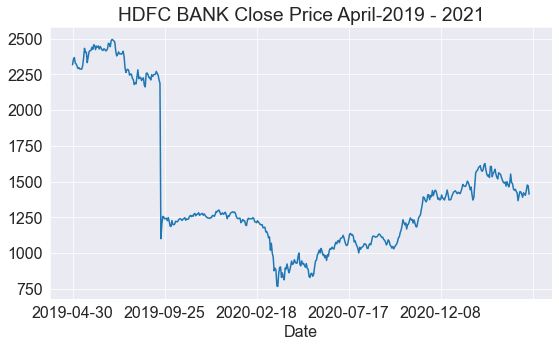

In [16]:
df1['Close'].plot()
plt.title("HDFC BANK Close Price April-2019 - 2021")
plt.show

In [17]:
AvgHigh = df1.describe()['High']['mean']
AvgLow = df1.describe()['Low']['mean']
AvgVolume = df1.describe()['Volume']['mean']
AvgDeliverable_volume=df1.describe()['Deliverable Volume']['mean']

print("Average High HDFC BANK Stock: ",AvgHigh,
     "\nAverage Low HDFC BANK: ",AvgLow,
     "\nAverage Volume for HDFC BANK: ", AvgVolume,
     "\nAverage Deliverable Volume of HDFC BANK: ", AvgDeliverable_volume)

Average High HDFC BANK Stock:  1453.3960764587541 
Average Low HDFC BANK:  1419.505432595573 
Average Volume for HDFC BANK:  10440685.474849094 
Average Deliverable Volume of HDFC BANK:  4872881.476861167


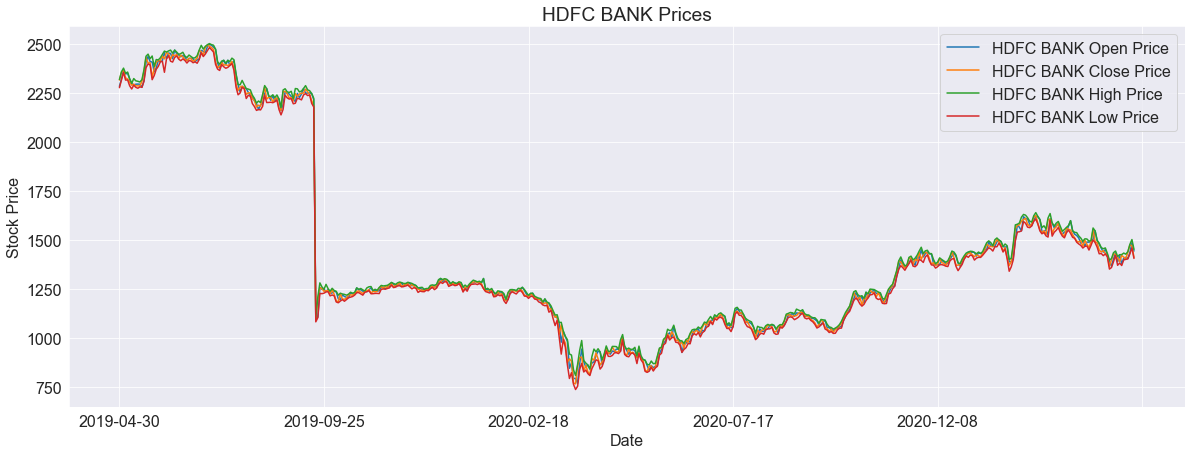

In [18]:
plt.figure(figsize=(20,7));
df1['Open'].plot(label = 'HDFC BANK Open Price')
df1['Close'].plot(label = 'HDFC BANK Close Price')
df1['High'].plot(label= 'HDFC BANK High Price')
df1['Low'].plot(label= 'HDFC BANK Low Price')
plt.legend()
plt.title('HDFC BANK Prices')
plt.ylabel("Stock Price")
plt.show()

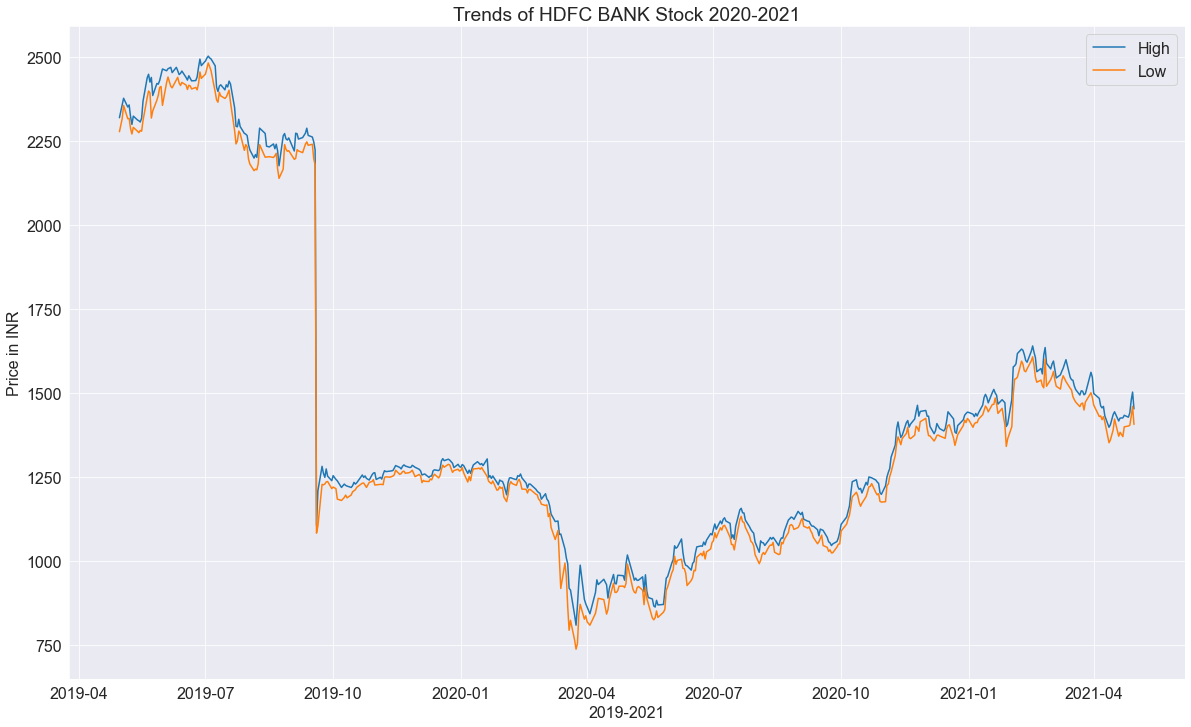

In [19]:
plt.figure(figsize=(20,12));
plt.plot(df1.Date, df1.High);
plt.plot(df1.Date, df1.Low);
plt.title("Trends of HDFC BANK Stock 2020-2021");
plt.xlabel('2019-2021');
plt.ylabel('Price in INR');
plt.legend(['High','Low']);

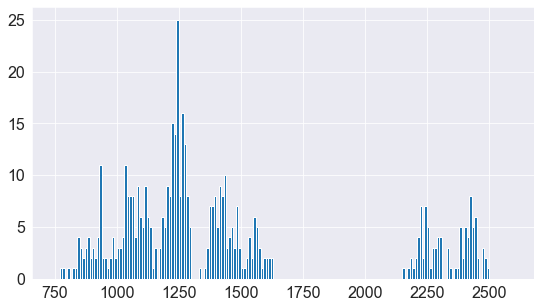

In [20]:
plt.hist(df1.VWAP,bins=np.arange(750,2600,10));

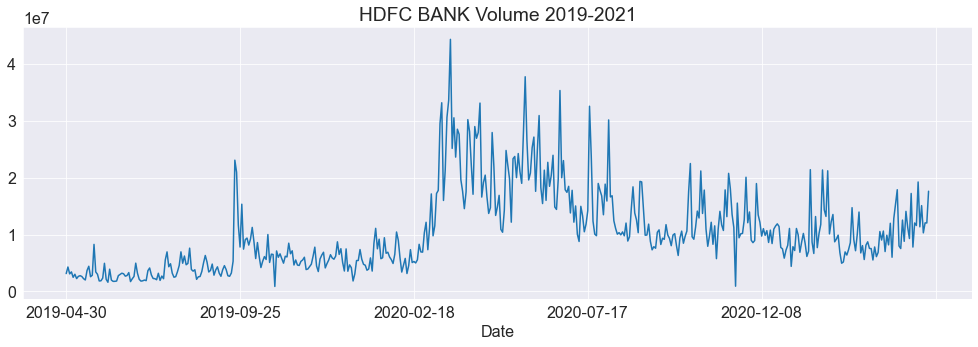

In [21]:
df1['Volume'].plot(figsize=(17,5))
plt.title("HDFC BANK Volume 2019-2021")
plt.show()

In [22]:
df1.iloc[[df1['Volume'].argmax()]]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,2020-03-20,HDFCBANK,EQ,895.55,875.0,914.6,824.55,881.25,882.85,868.05,...,83.462067,974.31665,67.125816,871.56665,97.61544,918.633362,81.701897,3,20,4


<AxesSubplot:xlabel='Date'>

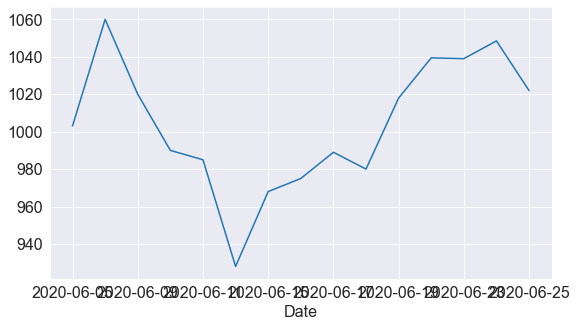

In [23]:
spike = df1.iloc[270:285]
spike['Open'].plot()

<AxesSubplot:xlabel='Date'>

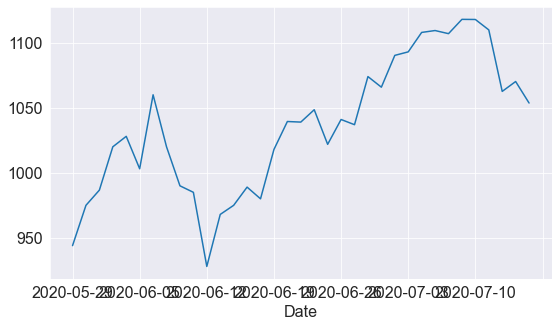

In [24]:
df1.iloc[265:300]['Open'].plot()

In [25]:
df1['Intraday Volume'] = df1['Volume'] - df1['Deliverable Volume']

C:\Users\lokev\AppData\Local\Temp\ipykernel_11160\3841036137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Intraday Volume'] = df1['Volume'] - df1['Deliverable Volume']


In [26]:
df1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week,Intraday Volume
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-30,2019-04-30,HDFCBANK,EQ,2280.95,2285.0,2320.00,2278.40,2319.0,2317.45,2306.89,...,2289.233398,15.952023,2253.966553,16.801584,2269.479980,16.022917,4,30,1,1187890.0
2019-05-02,2019-05-02,HDFCBANK,EQ,2317.45,2323.5,2359.65,2317.50,2356.0,2355.80,2345.11,...,2301.266602,17.282667,2264.416748,16.465429,2283.783447,17.919800,5,2,3,1522035.0
2019-05-03,2019-05-03,HDFCBANK,EQ,2355.80,2364.2,2378.00,2356.50,2365.0,2367.95,2370.96,...,2321.550049,27.729082,2284.266602,25.601820,2307.443359,29.569883,5,3,4,1078259.0
2019-05-06,2019-05-06,HDFCBANK,EQ,2367.95,2348.0,2351.90,2317.05,2327.9,2328.45,2338.56,...,2352.550049,38.137840,2317.466553,42.502419,2340.986572,43.232307,5,6,0,1103493.0
2019-05-07,2019-05-07,HDFCBANK,EQ,2328.45,2351.9,2358.00,2318.00,2320.1,2322.35,2338.90,...,2363.183350,38.151363,2330.350098,40.849350,2351.543213,42.332779,5,7,1,1154461.0


Text(0.5, 1.0, 'Types of volume in hdfc bank ')

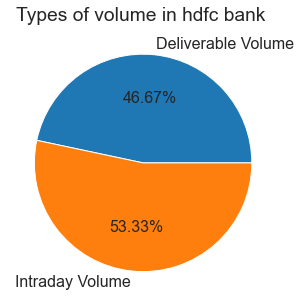

In [27]:
piechart_vars = ['Deliverable Volume','Intraday Volume'];
piechart_values = [df1['Deliverable Volume'].sum(), df1['Intraday Volume'].sum()]
plt.pie(piechart_values, labels=piechart_vars, autopct="%1.2f%%");
plt.title('Types of volume in hdfc bank ')

In [28]:
df1.sort_values(by='Trades', ascending=False).head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week,Intraday Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,2020-03-20,HDFCBANK,EQ,895.55,875.00,914.60,824.55,881.25,882.85,868.05,...,974.316650,67.125816,871.566650,97.615440,918.633362,81.701897,3,20,4,25433851.0
2020-03-18,2020-03-18,HDFCBANK,EQ,975.10,985.00,993.00,865.00,898.50,876.90,916.25,...,1042.816650,47.301273,956.299988,69.618401,1004.669983,54.236031,3,18,2,12080413.0
2020-03-27,2020-03-27,HDFCBANK,EQ,901.10,944.95,988.65,872.10,900.00,904.45,923.14,...,871.716675,62.640987,778.333313,47.396778,826.119995,55.893776,3,27,4,18176822.0
2020-03-24,2020-03-24,HDFCBANK,EQ,771.55,795.25,810.00,738.75,774.80,767.70,775.82,...,891.099976,83.503098,794.849976,85.483727,836.526672,88.777092,3,24,1,15104037.0
2020-03-19,2020-03-19,HDFCBANK,EQ,876.90,847.00,919.95,795.00,904.60,895.55,857.03,...,1013.333313,50.550922,938.233337,79.516319,970.653320,64.965439,3,19,3,17366652.0


In [29]:
df1.sort_values(by='Trades', ascending=False).head()['High']

Date
2020-03-20    914.60
2020-03-18    993.00
2020-03-27    988.65
2020-03-24    810.00
2020-03-19    919.95
Name: High, dtype: float64

In [30]:
ma = df1
ma.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 2019-04-30 to 2021-04-30
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                497 non-null    datetime64[ns]
 1   Symbol              497 non-null    object        
 2   Series              497 non-null    object        
 3   Prev Close          497 non-null    float64       
 4   Open                497 non-null    float64       
 5   High                497 non-null    float64       
 6   Low                 497 non-null    float64       
 7   Last                497 non-null    float64       
 8   Close               497 non-null    float64       
 9   VWAP                497 non-null    float64       
 10  Volume              497 non-null    int64         
 11  Turnover            497 non-null    float64       
 12  Trades              497 non-null    float64       
 13  Deliverable Volume  497 non-null    flo

In [31]:
ma.index

Index(['2019-04-30', '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07',
       '2019-05-08', '2019-05-09', '2019-05-10', '2019-05-13', '2019-05-14',
       ...
       '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22', '2021-04-23',
       '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30'],
      dtype='object', name='Date', length=497)

C:\Users\lokev\AppData\Local\Temp\ipykernel_11160\1834343064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma['MA50'] = ma['Open'].rolling(50).mean()
C:\Users\lokev\AppData\Local\Temp\ipykernel_11160\1834343064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma['MA200'] = ma['Open'].rolling(200).mean()


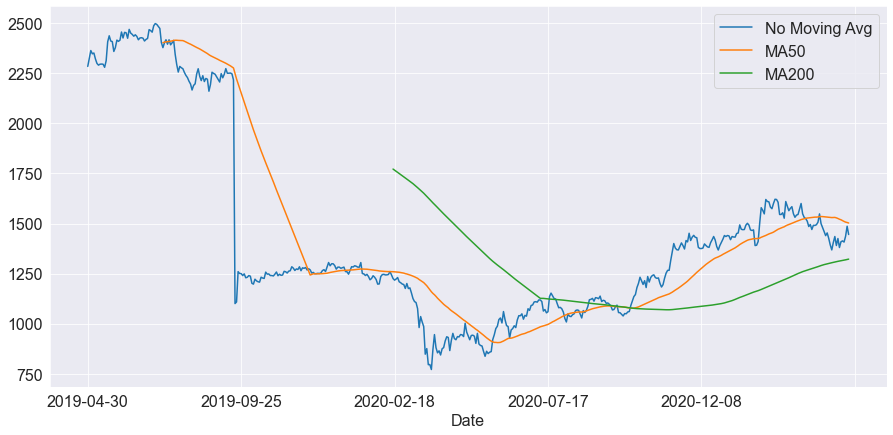

In [32]:
ma['Open'].plot(label="No Moving Avg",figsize=(15,7))
ma['MA50'] = ma['Open'].rolling(50).mean()
ma['MA50'].plot(label='MA50')

ma['MA200'] = ma['Open'].rolling(200).mean()
ma['MA200'].plot(label='MA200')

plt.legend()

In [33]:
ma['Returns'] = (ma['Close']/ ma['Close'].shift(1)) - 1
ma.head()

C:\Users\lokev\AppData\Local\Temp\ipykernel_11160\2372348197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma['Returns'] = (ma['Close']/ ma['Close'].shift(1)) - 1


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week,Intraday Volume,MA50,MA200,Returns
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-30,2019-04-30,HDFCBANK,EQ,2280.95,2285.0,2320.00,2278.40,2319.0,2317.45,2306.89,...,16.801584,2269.479980,16.022917,4,30,1,1187890.0,NaN,NaN,NaN
2019-05-02,2019-05-02,HDFCBANK,EQ,2317.45,2323.5,2359.65,2317.50,2356.0,2355.80,2345.11,...,16.465429,2283.783447,17.919800,5,2,3,1522035.0,NaN,NaN,0.016548
2019-05-03,2019-05-03,HDFCBANK,EQ,2355.80,2364.2,2378.00,2356.50,2365.0,2367.95,2370.96,...,25.601820,2307.443359,29.569883,5,3,4,1078259.0,NaN,NaN,0.005157
2019-05-06,2019-05-06,HDFCBANK,EQ,2367.95,2348.0,2351.90,2317.05,2327.9,2328.45,2338.56,...,42.502419,2340.986572,43.232307,5,6,0,1103493.0,NaN,NaN,-0.016681
2019-05-07,2019-05-07,HDFCBANK,EQ,2328.45,2351.9,2358.00,2318.00,2320.1,2322.35,2338.90,...,40.849350,2351.543213,42.332779,5,7,1,1154461.0,NaN,NaN,-0.002620


<AxesSubplot:>

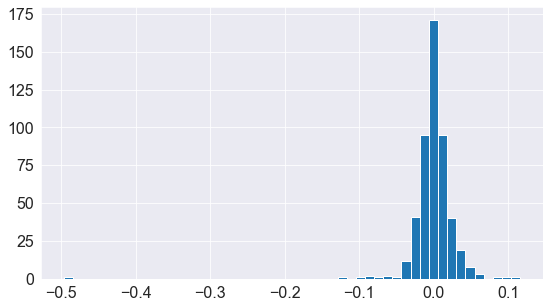

In [34]:
ma['Returns'].hist(bins=50)

In [35]:
ma['Cumulative Return'] = (1 + ma['Returns']).cumprod()
ma.head()

C:\Users\lokev\AppData\Local\Temp\ipykernel_11160\3176397750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma['Cumulative Return'] = (1 + ma['Returns']).cumprod()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week,Intraday Volume,MA50,MA200,Returns,Cumulative Return
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-30,2019-04-30,HDFCBANK,EQ,2280.95,2285.0,2320.00,2278.40,2319.0,2317.45,2306.89,...,2269.479980,16.022917,4,30,1,1187890.0,NaN,NaN,NaN,NaN
2019-05-02,2019-05-02,HDFCBANK,EQ,2317.45,2323.5,2359.65,2317.50,2356.0,2355.80,2345.11,...,2283.783447,17.919800,5,2,3,1522035.0,NaN,NaN,0.016548,1.016548
2019-05-03,2019-05-03,HDFCBANK,EQ,2355.80,2364.2,2378.00,2356.50,2365.0,2367.95,2370.96,...,2307.443359,29.569883,5,3,4,1078259.0,NaN,NaN,0.005157,1.021791
2019-05-06,2019-05-06,HDFCBANK,EQ,2367.95,2348.0,2351.90,2317.05,2327.9,2328.45,2338.56,...,2340.986572,43.232307,5,6,0,1103493.0,NaN,NaN,-0.016681,1.004747
2019-05-07,2019-05-07,HDFCBANK,EQ,2328.45,2351.9,2358.00,2318.00,2320.1,2322.35,2338.90,...,2351.543213,42.332779,5,7,1,1154461.0,NaN,NaN,-0.002620,1.002114


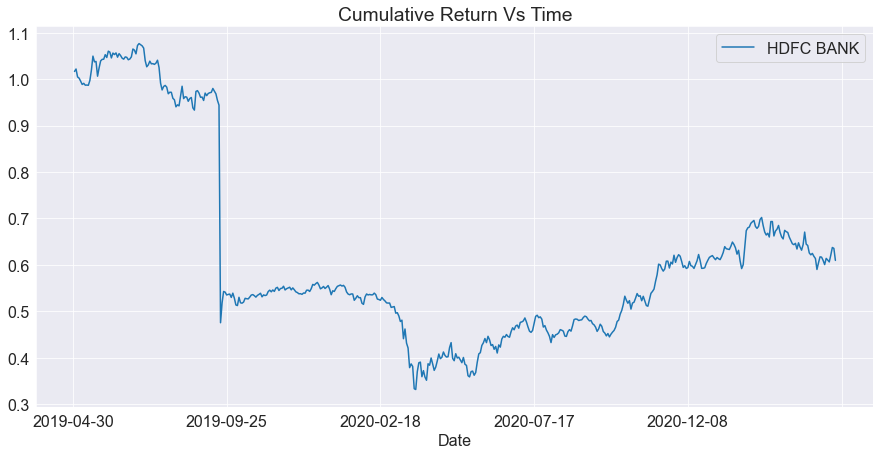

In [36]:
ma['Cumulative Return'].plot(label='HDFC BANK', figsize=(15,7))
plt.title("Cumulative Return Vs Time")
plt.legend()

In [37]:
df = df.drop(columns=['Symbol'])
df = df.drop(columns=['Series'])

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
x = df[['Close','Volume','Trades']]

In [40]:
y = df['Turnover']

In [41]:
x.head()

,Close,Volume,Trades
Date,,,
2000-01-03,170.00,33259,82923.625407
2000-01-04,173.80,168710,82923.625407
2000-01-05,166.95,159820,82923.625407
2000-01-06,168.30,85026,82923.625407
2000-01-07,168.35,85144,82923.625407


In [42]:
y.head()

Date
2000-01-03    5.638122e+11
2000-01-04    2.952261e+12
2000-01-05    2.704094e+12
2000-01-06    1.432166e+12
2000-01-07    1.420158e+12
Name: Turnover, dtype: float64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
X_train.shape, X_test.shape

((3714, 3), (1592, 3))

In [47]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [48]:
y_train.shape, y_test.shape

((3714, 1), (1592, 1))

In [49]:
lr.score(X_test, y_test)

0.9197752169228752

In [50]:
y_train_pred = lr.predict(X_train)
y_train_pred

array([1.50885086e+14, 2.28485537e+14, 1.31428711e+14, ...,
       1.41836769e+13, 1.92196363e+14, 3.74100718e+14])

In [51]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([ 2.50864982e+14, -5.56258436e+13,  2.07013985e+15, ...,
        9.31528079e+12,  8.59673028e+13,  2.44871381e+14])

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
print("R2Score : " ,r2_score(y_test, y_test_pred)) 
print("mean_absolute_error : ",mean_absolute_error(y_test, y_test_pred))
print("mean_squared_error : " ,mean_squared_error(y_test, y_test_pred)) 
print("Root mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2Score :  0.9197752169228752
mean_absolute_error :  70777702355970.05
mean_squared_error :  1.680752686314312e+28
Root mean_squared_error :  129643846221651.11


In [54]:
#Random Forest

SyntaxError: invalid syntax (3586547537.py, line 1)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test) 

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train_std,y_train)
rf_tree_y_pred = rf_tree.predict(X_train_std)
print("Accuracy: {}".format(rf_tree.score(X_train_std,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

C:\Users\lokev\AppData\Local\Temp\ipykernel_11160\2977850776.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tree.fit(X_train_std,y_train)


Accuracy: 0.9722973217310512
R squared: 0.9722973217310512


In [ ]:
#time series 

In [58]:
df_train = df[df.Date < "2018"]
df_valid = df[df.Date >= "2018"]

In [59]:
df_valid.shape

(823, 24)

In [60]:
!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

In [61]:
df_train.head().T

Date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07
Date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00
Prev Close,157.4,170.0,173.8,166.95,168.3
Open,166.0,182.0,170.0,168.0,162.15
High,170.0,183.45,173.9,170.0,171.0
Low,166.0,171.0,165.0,165.3,162.15
Last,170.0,174.0,168.0,168.95,170.75
Close,170.0,173.8,166.95,168.3,168.35
VWAP,169.52,174.99,169.2,168.44,166.79
Volume,33259,168710,159820,85026,85144
Turnover,563812250000.0,2952261350000.0,2704093975000.0,1432165990000.0,1420157785000.0


In [62]:
y_train = df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn = df_train["Close"].to_numpy().reshape(-1,1)

In [63]:
y_valid = df_valid["Close"]
scaler1=MinMaxScaler(feature_range=(0,1))
y_valid1=scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn = df_valid["Close"].to_numpy().reshape(-1,1)

In [64]:
X_train = df_train.drop(columns=["Close"])
X_train1 = X_train.drop("Date", axis=1)
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat((X_train1, X_train.Date), 1)

C:\Users\lokev\AppData\Local\Temp\ipykernel_11160\2834614213.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_train2 = pd.concat((X_train1, X_train.Date), 1)


In [65]:
X_valid = df_valid.drop(columns=["Close"])
X_valid1 = X_valid.drop("Date", axis=1)
X_valid1 = (X_valid1-X_valid1.min())/(X_valid1.max()-X_valid1.min())
X_valid2 = pd.concat((X_valid1, X_valid.Date), 1)

C:\Users\lokev\AppData\Local\Temp\ipykernel_11160\3306476984.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_valid2 = pd.concat((X_valid1, X_valid.Date), 1)


In [66]:
X_train3 = X_train2.drop(columns=['Date']).to_numpy()
X_valid3 = X_valid2.drop(columns=['Date']).to_numpy()

In [67]:
y_train1 = y_train1.reshape(-1,1)
y_valid1 = y_valid1.reshape(-1,1)

In [68]:
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

In [69]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True) # Change verbose to True if you want to see it train

[0]	validation_0-rmse:0.31089	validation_1-rmse:0.27621
[1]	validation_0-rmse:0.30779	validation_1-rmse:0.27346
[2]	validation_0-rmse:0.30473	validation_1-rmse:0.27075
[3]	validation_0-rmse:0.30169	validation_1-rmse:0.26808
[4]	validation_0-rmse:0.29869	validation_1-rmse:0.26543
[5]	validation_0-rmse:0.29572	validation_1-rmse:0.26280
[6]	validation_0-rmse:0.29277	validation_1-rmse:0.26021
[7]	validation_0-rmse:0.28986	validation_1-rmse:0.25764
[8]	validation_0-rmse:0.28697	validation_1-rmse:0.25508
[9]	validation_0-rmse:0.28412	validation_1-rmse:0.25257
[10]	validation_0-rmse:0.28129	validation_1-rmse:0.25006
[11]	validation_0-rmse:0.27849	validation_1-rmse:0.24759
[12]	validation_0-rmse:0.27572	validation_1-rmse:0.24515
[13]	validation_0-rmse:0.27298	validation_1-rmse:0.24271


H:\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.27026	validation_1-rmse:0.24030
[15]	validation_0-rmse:0.26757	validation_1-rmse:0.23794
[16]	validation_0-rmse:0.26491	validation_1-rmse:0.23558
[17]	validation_0-rmse:0.26227	validation_1-rmse:0.23326
[18]	validation_0-rmse:0.25966	validation_1-rmse:0.23093
[19]	validation_0-rmse:0.25708	validation_1-rmse:0.22866
[20]	validation_0-rmse:0.25452	validation_1-rmse:0.22641
[21]	validation_0-rmse:0.25199	validation_1-rmse:0.22415
[22]	validation_0-rmse:0.24948	validation_1-rmse:0.22194
[23]	validation_0-rmse:0.24700	validation_1-rmse:0.21972
[24]	validation_0-rmse:0.24454	validation_1-rmse:0.21756
[25]	validation_0-rmse:0.24211	validation_1-rmse:0.21540
[26]	validation_0-rmse:0.23970	validation_1-rmse:0.21328
[27]	validation_0-rmse:0.23731	validation_1-rmse:0.21116
[28]	validation_0-rmse:0.23495	validation_1-rmse:0.20908
[29]	validation_0-rmse:0.23261	validation_1-rmse:0.20704
[30]	validation_0-rmse:0.23030	validation_1-rmse:0.20499
[31]	validation_0-rmse:0.22801	

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)